## やること

* https://www.slideshare.net/KenjiUrai/explanation-of-gpr
    * 式の展開
    * カーネルを使わないと...

In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [92]:
# data,target= load_iris().data,load_iris().target
# print(data.shape, target.shape)
# plt.subplot(121)
# plt.scatter(data[:,0], target)
# plt.subplot(122)
# plt.scatter(data[:,1], target)
num = 150
data = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)]).T
target = np.sin(data[:,0])+np.cos(data[:,1])+np.random.rand(len(data))
#plt.scatter(data, target)

In [93]:
sample = random.sample(range(len(data)),k=len(data))

sample_num = 50
X = data[sample[:sample_num],0:2].T.reshape(2,-1)
X_h = data[sample[sample_num:],0:2].T.reshape(2,-1)
y = target[sample[:sample_num]].reshape(-1,1)

sg = 0.1
D,N = X.shape
S = np.array([[10,1],[0.1,0.01]])

#X-X_h
print(X.shape, y.shape)

(2, 50) (50, 1)


In [94]:
def inv(X):
    return np.linalg.inv(X)

def norm(x):
    return np.linalg.norm(x)

def kernel(x, y, a=0.1, b=0.1):
    return a*np.exp((-b/2)*norm(x-y)**2)

def K(X):
    N = X.shape[1]
    KM = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            KM[i,j] = kernel(X[:,i],X[:,j]) 
    return KM

def k(X_h, X):
    N_h, N = X_h.shape[1], X.shape[1]
    kM = np.zeros((N,N_h))
    for i in range(N):
        for j in range(N_h):
            kM[i,j] = kernel(X_h[:,j], X[:,i]) 
    return kM

def k_(X):
    N = X.shape[1]
    kv = np.zeros((N,1))
    for i in range(N):
        kv[i,0] = kernel(X[:,i], X[:,i])
    return kv
    

In [85]:
#X_h-X[:,1]

k_(X_h).shape
k_M.T.shape



#k(X_h, X).shape
(k_V-np.diag(k_M.T.dot(C_M).dot(k_M)).reshape(-1,1)).shape

(100, 1)

array([[ 0.00479502],
       [ 0.01054518],
       [ 0.00504595],
       [ 0.00834178],
       [ 0.00687153],
       [ 0.00492838],
       [ 0.00484946],
       [ 0.00564398],
       [ 0.00438884],
       [ 0.00805058],
       [ 0.00496168],
       [ 0.00456285],
       [ 0.00442246],
       [ 0.00668511],
       [ 0.00476908],
       [ 0.00639835],
       [ 0.00467757],
       [ 0.00651579],
       [ 0.00562183],
       [ 0.00462644],
       [ 0.00607547],
       [ 0.00486271],
       [ 0.00528226],
       [ 0.0054772 ],
       [ 0.00516723],
       [ 0.00595288],
       [ 0.0059357 ],
       [ 0.00438558],
       [ 0.00438365],
       [ 0.0044431 ],
       [ 0.0056761 ],
       [ 0.01250029],
       [ 0.00934114],
       [ 0.00709337],
       [ 0.00520275],
       [ 0.0049398 ],
       [ 0.00452452],
       [ 0.00957772],
       [ 0.0054797 ],
       [ 0.00447221],
       [ 0.00470673],
       [ 0.01305519],
       [ 0.00440081],
       [ 0.00508622],
       [ 0.00464929],
       [ 0

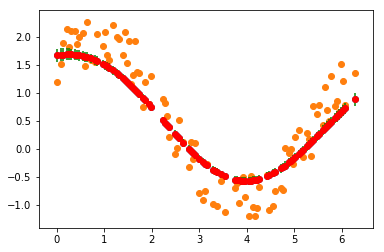

In [95]:
C_M = inv(K(X)+sg*np.eye(N,N))
k_M = k(X_h, X)
k_V = k_(X_h)

yh_mean = k_M.T.dot(C_M).dot(y)

yh_var = k_V - np.diag(k_M.T.dot(C_M).dot(k_M)).reshape(-1,1)

#plt.subplot(211)
plt.scatter(data[sample[sample_num:],0],yh_mean)
plt.scatter(data[sample[sample_num:],0],target[sample[sample_num:]])
# plt.subplot(212)
# plt.scatter(data[sample[sample_num:],1],yh_mean)
# plt.scatter(data[sample[sample_num:],1],target[sample[sample_num:]])


plt.errorbar(data[sample[sample_num:],0],yh_mean,yerr=np.sqrt(yh_var),fmt='ro',ecolor='g')

yh_var